## Input Preprocessing File for Non-Dynamic KMC Simulation Output
##### This code requires the following KMC Output Files to be in the same folder:
- "specnum_output.txt"
- "general_output.txt"

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
Test_Name = os.getcwd().rsplit('/',1)[1]

***
$\mathbf{\text{Extracting the specnum_output file: }}$<br>
***

In [3]:
#%matplotlib notebook
file=open('specnum_output.txt','r').readlines() #Reading in the relevant file
b=[]
for i in np.arange(len(file)): 
    b.append(file[i].split())                   #Dividing the rows into columns
o = pd.DataFrame(data=b)                        #Final output
print(o.head(4))
print(len(o))


#Extracting Number of Sites from the general_output file:
inp=open('general_output.txt','r').readlines()
for i in np.arange(len(inp)): 
    if 'Total number of lattice sites:' in inp[i]:
        val = i  #Line in text file where sentence is present

sites = int(inp[val][34:])
print('\n Number of sites:', sites)

      0        1                       2                       3   \
0  Entry  Nevents                    Time             Temperature   
1      1        0  0.0000000000000000E+00  4.2300000000000000E+02   
2      2   977472  1.0000000000000001E-01  4.2300000000000000E+02   
3      3   994174  2.0000000000000001E-01  4.2300000000000000E+02   

                        4     5    6    7      8    9    10  
0                   Energy    O*  CO*  O2*     O2   CO  CO2  
1  -5.5295999999999999E+01     0    0    0      0    0    0  
2  -2.6391748999991946E+03  2308   15    0  -1154  -15    0  
3  -2.6520115999991986E+03  2316   19    0  -1158  -19    0  
501

 Number of sites: 18432


#### Finding number of surface species

In [4]:
headings = (o.iloc[0,:])
n_ss = sum('*' in s for s in headings) #Number of surface species
print('Number of surface species:',n_ss)

Number of surface species: 3


#### Finding number of gas species

In [5]:
n_gs = len(headings)-5-n_ss
print('Number of gas species:',n_gs)

Number of gas species: 3


#### Adding column to calculate number of empty sites

In [6]:
n_c=(len(o.iloc[0,:])) #number of current columns
o[n_c]=" "           #Creating new empty column 
o.iloc[0,n_c]="*"    #Labelling the new empty column 

print(o.head(4))
st = 0 #Initializing empty site coverage vector


for i in range(len(o.iloc[1:])):
    if n_ss==0:
        site = sites
    else:
        for j in range(n_ss):
            st = st + float(o.iloc[i+1,5+j]) #Calculating no. of empty sites #Asuming empty sites are first to be reportes (i.e @5)
        site = sites - st
        st = 0
    o.iloc[i+1,n_c] = site
    
print(o.head(4))

      0        1                       2                       3   \
0  Entry  Nevents                    Time             Temperature   
1      1        0  0.0000000000000000E+00  4.2300000000000000E+02   
2      2   977472  1.0000000000000001E-01  4.2300000000000000E+02   
3      3   994174  2.0000000000000001E-01  4.2300000000000000E+02   

                        4     5    6    7      8    9    10 11  
0                   Energy    O*  CO*  O2*     O2   CO  CO2  *  
1  -5.5295999999999999E+01     0    0    0      0    0    0     
2  -2.6391748999991946E+03  2308   15    0  -1154  -15    0     
3  -2.6520115999991986E+03  2316   19    0  -1158  -19    0     
      0        1                       2                       3   \
0  Entry  Nevents                    Time             Temperature   
1      1        0  0.0000000000000000E+00  4.2300000000000000E+02   
2      2   977472  1.0000000000000001E-01  4.2300000000000000E+02   
3      3   994174  2.0000000000000001E-01  4.23000000

***
$\mathbf{\text{Plotting transient coverage of various species: }}$<br>
***

### Surface Species (COVERAGES): 

Column Location of Surface Species [5, 6, 7, 11]


Text(42.597222222222214, 0.5, 'Coverage (ML)')

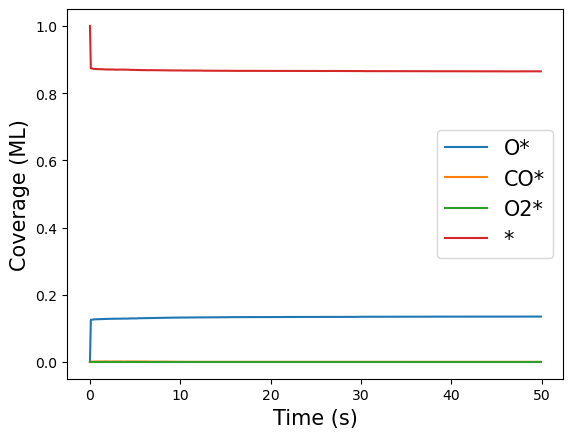

In [7]:
Sspecies = []
for i in range(n_ss):
    Sspecies.append(5+i) 
Sspecies.append(len(o.iloc[1,:])-1)#Including empty sites
    
print('Column Location of Surface Species',Sspecies) #in this eg, # 5 = O* ; 6 = CO* ; 7 = O2* ; 8 = O2 ; 9 = CO ; 10 = CO2 ; 11 = * {As seen from dataset}

#Calculating itme:
Gtime = o[2][1:].astype(float) 
#Calculating coverages:
Scoverages = np.empty([len(o.iloc[:,1])-1,len(Sspecies)])
for i in range(len(Scoverages[1,:])):
    Scoverages[:,i] = o[Sspecies[i]][1:].astype(float)/sites

#Plotting of effects of Time in seconds -> o[2]:
plt.figure()
for i in range(len(Sspecies)):
    #Plotting Time = x ; Coverage of species i = y
    plt.plot(Gtime,Scoverages[:,i],label=o.iloc[0,Sspecies[i]]) 

plt.legend(fontsize=15, loc='best')
plt.savefig('kMC_Coverages_'+Test_Name+'.png')
plt.xlabel((r'Time (s)'),size = '15.0')
plt.ylabel('Coverage (ML)',size = '15.0')
#plt.show()

### GAS SPECIES (No. of Molecules):

Column Location of Gas Species [8, 9, 10]


Text(0, 0.5, 'Number of Gas species molcs.')

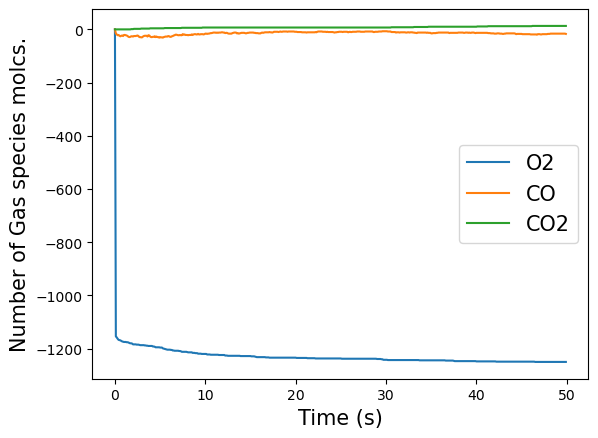

In [8]:
Gspecies = []
for i in range(n_gs):
    Gspecies.append(5+n_ss+i) 
    
print('Column Location of Gas Species',Gspecies) #in this eg, # 5 = O* ; 6 = CO* ; 7 = O2* ; 8 = O2 ; 9 = CO ; 10 = CO2 ; 11 = * {As seen from dataset}

#Calculating itme:
Gtime = o[2][1:].astype(float) 
#Extracting the number of gas species molecules:
Gnmol = np.empty([len(o.iloc[:,1])-1,len(Gspecies)])
for i in range(len(Gnmol[1,:])):
    Gnmol[:,i] = o[Gspecies[i]][1:].astype(float) #NEGATIVE INDICATES REACTANT SPECIES (Helpful for calculating rate of consumption)

#Plotting of effects of Time in seconds -> o[2]:
plt.figure()
for i in range(len(Gspecies)):
    #Plotting Time = x ; No of molecules of gas species i = y
    plt.plot(Gtime,Gnmol[:,i],label=o.iloc[0,Gspecies[i]]) 

plt.legend(fontsize=15, loc='best')
plt.xlabel((r'Time (s)'),size = '15.0')
plt.ylabel('Number of Gas species molcs.',size = '15.0')
#plt.show()

***
$\mathbf{\text{Printing steady rates of productions (TOF) of various species: }}$<br>
***

### GAS SPECIES ([TOF](https://zacros.org/files/kmc_workshop/Zacros_Tutorial_01.pdf)):

In [9]:
### Calculating the instantaneous rates of profuction (i.e grad/sites)
TOF_GS = np.empty([len(o.iloc[:,1])-1,len(Gspecies)]) #initializing an array of instantaneous TOFs for gaseous species
# grads = np.empty([len(o.iloc[:,1])-1,1])
for i in np.arange(len(Gspecies)):
    grads = np.gradient(Gnmol[:,i],Gtime,edge_order=2)
    TOF_GS[:,i] = grads/sites

## Creating extractable file for fitting purposes 

### Make sure the ORDER of species matches the parameter/modelling inputs and vice-versa

## ** NON-DYNAMIC KMC **

In [10]:
#Creating output datframe
Kinetic_Info = pd.DataFrame(np.array(Gtime), columns=['Time'])
#Appending surface coverages
for i in np.arange(np.shape(Scoverages)[1]):
    Kinetic_Info[o.iloc[0,Sspecies[i]]] = pd.Series(Scoverages[:,i])
#Appending gas species Turn over frequencies
for i in np.arange(len(Gspecies)):
    Kinetic_Info['R_'+o.iloc[0,Gspecies[i]]] = pd.Series(TOF_GS[:,i])    

Kinetic_Info    

,Time,O*,CO*,O2*,*,R_O2,R_CO,R_CO2
0,0.0,0.000000,0.000000,0.0,1.000000,-9.380425e-01,-0.011122,0.0
1,0.1,0.125217,0.000814,0.0,0.873969,-3.141276e-01,-0.005154,0.0
2,0.2,0.125651,0.001031,0.0,0.873318,-2.441406e-03,-0.001899,0.0
3,0.3,0.126194,0.001194,0.0,0.872613,-2.441406e-03,-0.000543,0.0
4,0.4,0.126628,0.001139,0.0,0.872233,-1.356337e-03,-0.000543,0.0
...,...,...,...,...,...,...,...,...
495,49.5,0.134928,0.000163,0.0,0.864909,0.000000e+00,0.000000,0.0
496,49.6,0.134928,0.000163,0.0,0.864909,0.000000e+00,0.000000,0.0
497,49.7,0.134928,0.000163,0.0,0.864909,0.000000e+00,0.000000,0.0
498,49.8,0.134928,0.000163,0.0,0.864909,0.000000e+00,-0.000271,0.0


In [11]:

File_Name = 'KMC_NonDynamic_Data_iCovg_iRates'+Test_Name+'.csv'

Kinetic_Info.to_csv(File_Name,index=False)

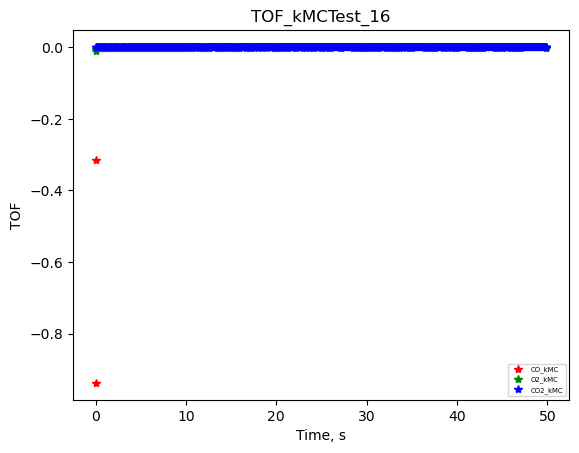

In [12]:
plt.figure()
plt.plot(Kinetic_Info.values[:,0], Kinetic_Info.values[:,5],'r*', label='CO_kMC')        
plt.plot(Kinetic_Info.values[:,0], Kinetic_Info.values[:,6],'g*', label='O2_kMC') 
plt.plot(Kinetic_Info.values[:,0], Kinetic_Info.values[:,7], 'b*', label='CO2_kMC') 
plt.xlabel('Time, s')
plt.ylabel("TOF")
plt.title('TOF_kMC'+Test_Name)
plt.savefig('kMC_TOF_'+Test_Name+'.png')
plt.legend(fontsize=5, loc='best')
plt.show()